In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zipfile
from io import BytesIO


In [2]:
data = 'ZINC250K'  #choice: ZINC, ZINC250K

In [8]:
if data == 'ZINC':
    file_path = '../moses/dataset/data/ZINC/train.zip'
    with zipfile.ZipFile(file_path, 'r') as zip_ref:    
            file = 'train.csv'
            with zip_ref.open(file) as file:
                # Read the CSV file into a pandas DataFrame
                df= pd.read_csv(BytesIO(file.read()), header=0)

    df['obj'] = 5*df['qed'] - df['SAS']

    print(f'data size: {df.shape[0]}')
    df.shape, df.head()

elif data == 'ZINC250K':
    file_path = '../moses/dataset/data/ZINC250K/train.csv'
    df = pd.read_csv(file_path)

Text(0, 0.5, 'obj')

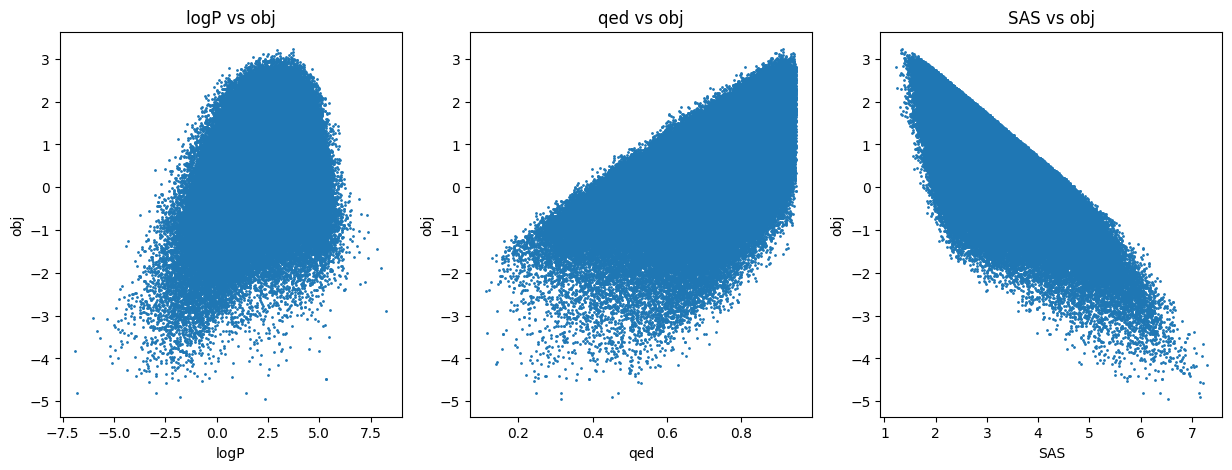

In [21]:
# plot 3 subplots with scatter plot of x as logP, qed, sas and y as obj
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df['logP'], df['obj'], s=1)
axs[0].set_title('logP vs obj')
axs[0].set_xlabel('logP')
axs[0].set_ylabel('obj')

axs[1].scatter(df['qed'], df['obj'], s=1)
axs[1].set_title('qed vs obj')
axs[1].set_xlabel('qed')
axs[1].set_ylabel('obj')

axs[2].scatter(df['SAS'], df['obj'], s=1)
axs[2].set_title('SAS vs obj')
axs[2].set_xlabel('SAS')
axs[2].set_ylabel('obj')


Text(0, 0.5, 'qed')

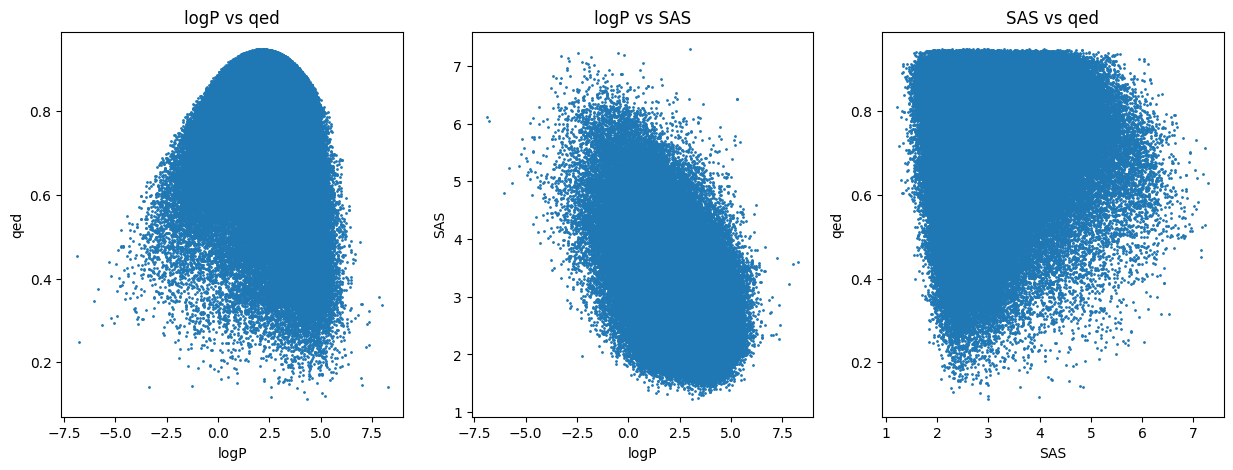

In [22]:
# plot 3 subplots with scatter plot of x as logP, qed, sas and y as obj
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df['logP'], df['qed'], s=1)
axs[0].set_title('logP vs qed')
axs[0].set_xlabel('logP')
axs[0].set_ylabel('qed')

axs[1].scatter(df['logP'], df['SAS'], s=1)
axs[1].set_title('logP vs SAS')
axs[1].set_xlabel('logP')
axs[1].set_ylabel('SAS')

axs[2].scatter(df['SAS'], df['qed'], s=1)
axs[2].set_title('SAS vs qed')
axs[2].set_xlabel('SAS')
axs[2].set_ylabel('qed')

In [16]:
## create dataframe with data for GPR fitting (training)
size = 10000
np.random.seed(0)
rand_indices = np.random.choice(len(df), size, replace=False)
gpr_fit_df = df.iloc[rand_indices]
gpr_fit_df.to_csv(f'{save_path}gpr_fit_{data}_df.csv', index=False)

print(f'data size: {gpr_fit_df.shape[0]}')
gpr_fit_df.head()

data size: 10000


,SMILES,SELFIES,logP,qed,SAS,obj
91883,Cc1nn(C)c(Cl)c1/C=C/C(=O)N(CCC(F)(F)F)C1CCCC1,[C][C][=N][N][Branch1][C][C][C][Branch1][C][Cl...,4.11872,0.710006,2.768596,0.781431
39490,COc1ccc2sc(C(=O)Nc3ccc4c(c3)COC4)c(C)c2c1,[C][O][C][=C][C][=C][S][C][Branch2][Ring1][Bra...,4.50082,0.730746,2.289621,1.364107
219381,CS(=O)(=O)c1cnn(-c2ccc(Cl)nn2)c1N,[C][S][=Branch1][C][=O][=Branch1][C][=O][C][C]...,0.30140,0.863554,2.754278,1.563493
120666,O=S(=O)(NCC1(c2ccccc2)CCOCC1)c1cc(F)cc(F)c1,[O][=S][=Branch1][C][=O][Branch2][Ring1][Branc...,2.99150,0.874960,2.383385,1.991416
54124,COc1ccc(/C=N/NC(=O)c2sc3cc([N+](=O)[O-])ccc3c2...,[C][O][C][=C][C][=C][Branch2][Ring1][=N][/C][=...,4.25260,0.314255,2.515581,-0.944304


In [13]:
## create dataframe with data for optimization start points
size = 50
np.random.seed(0)

opt_start_df = df[(df['obj'] > 0) & (df['obj'] < 2)]

rand_indices = np.random.choice(len(opt_start_df), size, replace=False)
opt_start_df = opt_start_df.iloc[rand_indices]
opt_start_df.to_csv(f'{save_path}opt_start_{data}_df.csv', index=False)

print(f'data size: {opt_start_df.shape[0]}')
opt_start_df.head()

data size: 50


,SMILES,SELFIES,logP,qed,SAS,obj
212837,CC(C)[C@@H](NC(=O)CN1C(=O)CNC1=O)c1nc2ccccc2[nH]1,[C][C][Branch1][C][C][C@@H1][Branch2][Ring1][C...,0.92800,0.719764,2.913562,0.685257
93385,SCC1(COC/C=C/c2ccccc2)CCC1,[S][C][C][Branch1][=C][C][O][C][/C][=C][/C][=C...,3.81650,0.576323,2.682703,0.198910
113496,Cc1noc(C)c1CC(=O)N1CCc2nc(NC(=O)c3ccccn3)sc2C1,[C][C][=N][O][C][Branch1][C][C][=C][Ring1][=Br...,2.52264,0.724819,2.555610,1.068484
152242,C=Cc1ccc(C(=O)NCc2cccnc2Oc2ccccc2F)cc1,[C][=C][C][=C][C][=C][Branch2][Ring1][=Branch2...,4.58600,0.677670,2.072639,1.315712
28978,COc1ccccc1C(=O)Nc1nc2ccc(C(=O)OC(C)C)cc2s1,[C][O][C][=C][C][=C][C][=C][Ring1][=Branch1][C...,4.12240,0.657687,1.982193,1.306243


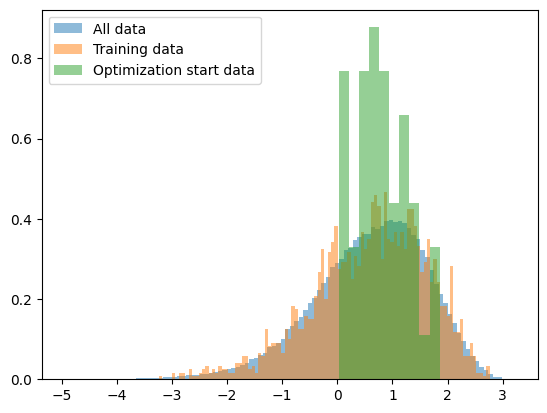

In [15]:
# plot the distribution of objective values of df and gpr_train_df
plt.figure()
plt.hist(df['obj'], bins=100, alpha=0.5, label='All data', density=True)
plt.hist(gpr_fit_df['obj'], bins=100, alpha=0.5, label='Training data', density=True)
plt.hist(opt_start_df['obj'], bins=10, alpha=0.5, label='Optimization start data', density=True)
plt.legend()
plt.show()



In [19]:
import pandas as pd

In [49]:
opt_file_path = r'..\..\NewMoses_results\optimized\vae_property_optimized.csv'
# read the optimized data
df = pd.read_csv(opt_file_path)
df.head()

,SMILES_ini,SELFIES_ini,QED_ini,SA_ini,logP_ini,objective_ini,SMILES,SELFIES,QED,SA,logP,objective,opt_z,pred objective
0,CCOC(=O)NC1CCCN(C(=O)C2=CC=C3C(=C2)N=C(C)N3C)C1,[C][C][O][C][=Branch1][C][=O][N][C][C][C][C][N...,0.926272,2.690769,2.23242,1.940592,CCOC(=O)NC1CCCN(C(=O)C2=CC=C3C(=C2)N=C(C)N3C)C1,[C][C][O][C][=Branch1][C][=O][N][C][C][C][C][N...,0.926272,2.690769,2.23242,1.940592,[-1.82720216e-03 1.18777053e-02 -4.79100198e-...,1.932384
1,COC1=CC=C(OC)C(N2C(C)=C(C(C)=O)C(C(C)=O)=C2C)=C1,[C][O][C][=C][C][=C][Branch1][Ring1][O][C][C][...,0.792228,2.261724,3.51654,1.699416,COC1=CC=C(OC)C(N2C(C)=C(C(C)=O)C3=C2C(C)CC3)=C1,[C][O][C][=C][C][=C][Branch1][Ring1][O][C][C][...,0.799388,3.070773,4.05522,0.926166,[-4.92974855e-02 2.51659807e-02 4.97096106e-...,0.724423
2,COC1=CC(C)=NC(N2CCN(C(=O)C(C)N3C=NC=N3)CC2)=N1,[C][O][C][=C][C][Branch1][C][C][=N][C][Branch2...,0.795495,2.954142,0.29492,1.023330,COC1=CC(C)=NC(N2CCN(C(=O)C(C)N3C=NC=N3)CC2)=N1,[C][O][C][=C][C][Branch1][C][C][=N][C][Branch2...,0.795495,2.954142,0.29492,1.023330,[ 1.32764000e-02 5.40873483e-02 9.11794975e-...,0.875701
3,CN1N=CC2=C(C(=O)NC3=CC=C(Cl)C=N3)C=C(C4CC4)N=C21,[C][N][N][=C][C][=C][Branch1][P][C][=Branch1][...,0.801712,2.365404,3.14640,1.643155,CN1N=CC2=C(C(=O)NC3=CC=C(Cl)C=N3)C=C(C4CC4)N=C21,[C][N][N][=C][C][=C][Branch1][P][C][=Branch1][...,0.801712,2.365404,3.14640,1.643155,[-5.3267315e-02 2.7872943e-03 5.9131555e-02 ...,0.987491
4,CC(C1=NN=C2N1CCCCC2)N3CCN(C(=O)OC(C)(C)C)CC3,[C][C][Branch1][#C][C][=N][N][=C][N][Ring1][Br...,0.821154,2.927349,2.61820,1.178423,CC1(C(=O)N(C)[NH1]C1)N(CC2CCCN(S(C)(=O)=O)C2C3...,[C][C][Branch1][=N][C][=Branch1][C][=O][N][Bra...,0.754690,4.181506,-0.14230,-0.408057,[ 1.68819297e-02 3.29462551e-02 -4.13166061e-...,0.914636


In [52]:
opt_df = df[['SMILES', 'objective_ini', 'objective', 'pred objective']]
opt_df.head()

# get the index of opt_df which have same objective_ini and objective
idx = opt_df[(opt_df['objective_ini'] == opt_df['objective'])].index
print(f'Number of optimized data with the same initial and optimized objective: {len(idx)}')
print(f'Number of total optimized data: {len(opt_df)}')

opt_df.head()

Number of optimized data with the same initial and optimized objective: 19
Number of total optimized data: 50


,SMILES,objective_ini,objective,pred objective
0,CCOC(=O)NC1CCCN(C(=O)C2=CC=C3C(=C2)N=C(C)N3C)C1,1.940592,1.940592,1.932384
1,COC1=CC=C(OC)C(N2C(C)=C(C(C)=O)C3=C2C(C)CC3)=C1,1.699416,0.926166,0.724423
2,COC1=CC(C)=NC(N2CCN(C(=O)C(C)N3C=NC=N3)CC2)=N1,1.023330,1.023330,0.875701
3,CN1N=CC2=C(C(=O)NC3=CC=C(Cl)C=N3)C=C(C4CC4)N=C21,1.643155,1.643155,0.987491
4,CC1(C(=O)N(C)[NH1]C1)N(CC2CCCN(S(C)(=O)=O)C2C3...,1.178423,-0.408057,0.914636


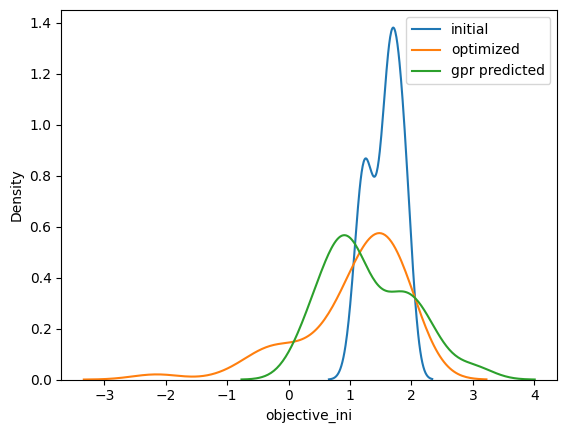

In [51]:
# plot kde of the objective values
import seaborn as sns
plt.figure()
sns.kdeplot(df['objective_ini'], label='initial')
sns.kdeplot(df['objective'], label='optimized')
sns.kdeplot(df['pred objective'], label='gpr predicted')

plt.legend()
plt.show()
